In [100]:
import pandas as pd
import numpy as np

In [101]:
r1_lions_bat = pd.read_csv ('Sunrisers/R1-SRH-Bat.csv')
r2_lions_bat = pd.read_csv ('Sunrisers/R2-SRH-Bat.csv')
r3_lions_bat = pd.read_csv ('Sunrisers/R3-SRH-Bat.csv')

In [102]:
r1_lions_bat.head()

,player,games,inning,not_outs,total_runs,balls_faced,bb,ave,strike_rate,hundreds,fifties,fours,sixes
0,Manish Warner,1,1,1.0,71,39,71* (39),NaN,182.051282,0,1,4,5
1,Jason Mohammed,1,1,1.0,15,18,15* (18),NaN,83.333333,0,0,1,0
2,Priyam Singh,1,1,0.0,14,18,14 (18),14.0,77.777778,0,0,1,1
3,David Williamson,1,1,0.0,13,17,13 (17),13.0,76.470588,0,0,1,0
4,Kane Pandey,1,1,0.0,12,16,12 (16),12.0,75.000000,0,0,1,0


In [103]:
r2_lions_bat.head()

,player,games,inning,not_outs,total_runs,balls_faced,bb,ave,strike_rate,hundreds,fifties,fours,sixes
0,David Williamson,1,1,0.0,53,37,53 (37),53.0,143.243243,0,1,3,2
1,Kane Pandey,1,1,1.0,49,46,49* (46),NaN,106.521739,0,0,5,1
2,Priyam Singh,1,1,1.0,24,24,24* (24),NaN,100.000000,0,0,1,1
3,Johhny Saha,1,1,0.0,12,13,12 (13),12.0,92.307692,0,0,1,0
4,Bhuvneshwar Kaul,1,0,NaN,0,0,0* (0),NaN,NaN,0,0,0,0


In [104]:
r3_lions_bat.head()

,player,games,inning,not_outs,total_runs,balls_faced,bb,ave,strike_rate,hundreds,fifties,fours,sixes
0,David Williamson,1,1,1.0,86,59,86* (59),NaN,145.762712,0,1,4,5
1,Naman Goswami,1,1,0.0,45,49,45 (49),45.0,91.836735,0,0,2,1
2,Virat Shankar,1,1,1.0,8,10,8* (10),NaN,80.000000,0,0,1,0
3,Kane Pandey,1,1,0.0,1,3,1 (3),1.0,33.333333,0,0,0,0
4,Basil Raj,1,0,NaN,0,0,0* (0),NaN,NaN,0,0,0,0


In [105]:
df = pd.concat([r1_lions_bat, r2_lions_bat, r3_lions_bat])
df = df.reset_index()
del df['index']
df.head()

,player,games,inning,not_outs,total_runs,balls_faced,bb,ave,strike_rate,hundreds,fifties,fours,sixes
0,Manish Warner,1,1,1.0,71,39,71* (39),NaN,182.051282,0,1,4,5
1,Jason Mohammed,1,1,1.0,15,18,15* (18),NaN,83.333333,0,0,1,0
2,Priyam Singh,1,1,0.0,14,18,14 (18),14.0,77.777778,0,0,1,1
3,David Williamson,1,1,0.0,13,17,13 (17),13.0,76.470588,0,0,1,0
4,Kane Pandey,1,1,0.0,12,16,12 (16),12.0,75.000000,0,0,1,0


In [106]:
df2 = df.groupby(['player']).sum()
del df2['ave']
del df2['strike_rate']
df2

,games,inning,not_outs,total_runs,balls_faced,hundreds,fifties,fours,sixes
player,,,,,,,,,
Basil Raj,1,0,0.0,0,0,0,0,0,0
Bhuvneshwar Kaul,3,0,0.0,0,0,0,0,0,0
Billy Ahmed,3,0,0.0,0,0,0,0,0,0
David Williamson,3,3,1.0,152,113,0,2,8,7
Jason Mohammed,3,1,1.0,15,18,0,0,1,0
Johhny Saha,3,2,0.0,15,25,0,0,1,0
Kane Pandey,3,3,1.0,62,65,0,0,6,1
Manish Warner,2,1,1.0,71,39,0,1,4,5
Naman Goswami,1,1,0.0,45,49,0,0,2,1


In [107]:
df2.insert(5,"average", df2['total_runs'] / (df2['inning'] - df2['not_outs']))
# df2['avg'] = df2['total_runs'] / df2['inning'] - df2['not_outs']

In [108]:
df2.insert(6,"strike_rate", df2['total_runs']*100 / df2['balls_faced'])

In [109]:
df2 = df2.sort_values(by ='total_runs', ascending = 0)
df2

,games,inning,not_outs,total_runs,balls_faced,average,strike_rate,hundreds,fifties,fours,sixes
player,,,,,,,,,,,
David Williamson,3,3,1.0,152,113,76.0,134.513274,0,2,8,7
Manish Warner,2,1,1.0,71,39,inf,182.051282,0,1,4,5
Kane Pandey,3,3,1.0,62,65,31.0,95.384615,0,0,6,1
Naman Goswami,1,1,0.0,45,49,45.0,91.836735,0,0,2,1
Priyam Singh,2,2,1.0,38,42,38.0,90.476190,0,0,2,2
Jason Mohammed,3,1,1.0,15,18,inf,83.333333,0,0,1,0
Johhny Saha,3,2,0.0,15,25,7.5,60.000000,0,0,1,0
Virat Shankar,1,1,1.0,8,10,inf,80.000000,0,0,1,0
Basil Raj,1,0,0.0,0,0,NaN,NaN,0,0,0,0


In [110]:
df2 = df2.rename(columns={'player': 'Player Name', 'games': 'Matches', 'inning': 'Innings', 'not_outs': 'Not Outs', 'total_runs': 'Runs', 'balls_faced': 'Balls Faced', 
                         'average': 'Average', 'strike_rate' : 'Strike Rate', 'hundreds':'100s', 'fifties':'50s', 'fours':'4s', 'sixes':'6s'})

In [111]:
df2

,Matches,Innings,Not Outs,Runs,Balls Faced,Average,Strike Rate,100s,50s,4s,6s
player,,,,,,,,,,,
David Williamson,3,3,1.0,152,113,76.0,134.513274,0,2,8,7
Manish Warner,2,1,1.0,71,39,inf,182.051282,0,1,4,5
Kane Pandey,3,3,1.0,62,65,31.0,95.384615,0,0,6,1
Naman Goswami,1,1,0.0,45,49,45.0,91.836735,0,0,2,1
Priyam Singh,2,2,1.0,38,42,38.0,90.476190,0,0,2,2
Jason Mohammed,3,1,1.0,15,18,inf,83.333333,0,0,1,0
Johhny Saha,3,2,0.0,15,25,7.5,60.000000,0,0,1,0
Virat Shankar,1,1,1.0,8,10,inf,80.000000,0,0,1,0
Basil Raj,1,0,0.0,0,0,NaN,NaN,0,0,0,0


In [112]:
df2.to_csv('SRH_stats_bat.csv')

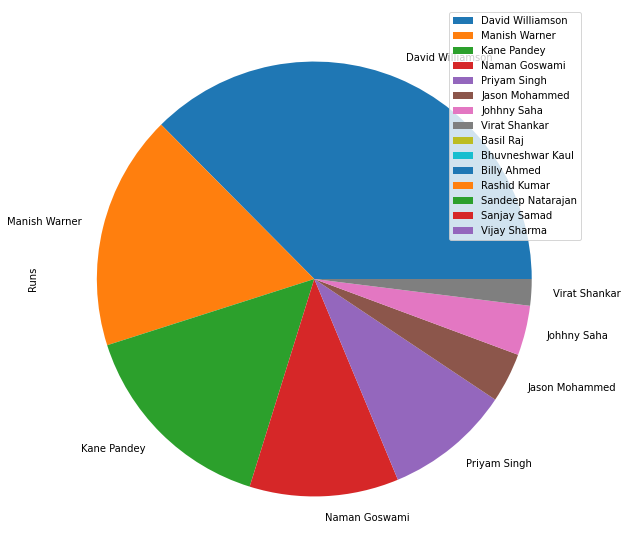

In [113]:
plot = df2.plot.pie(y='Runs', figsize=(10, 10))

In [114]:
r1_lions_bol = pd.read_csv ('Sunrisers/R1-SRH-Bol.csv')
r2_lions_bol = pd.read_csv ('Sunrisers/R2-SRH-Bol.csv')
r3_lions_bol = pd.read_csv ('Sunrisers/R3-SRH-Bol.csv')

In [115]:
df3 = pd.concat([r1_lions_bol, r2_lions_bol, r3_lions_bol])
df3 = df3.reset_index()
del df3['index']
df3.head()

,player,games,inning,overs,total_wickets,bbi,runs_conceded,ave,economy_rate,strike_rate,fifers,fourfers
0,Jason Mohammed,1,1,4.0,2,2/19,19,9.5,4.750000,12.0,0,0
1,Bhuvneshwar Kaul,1,1,4.0,1,1/23,23,23.0,5.750000,24.0,0,0
2,Billy Ahmed,1,1,4.0,1,1/20,20,20.0,5.000000,24.0,0,0
3,Rashid Kumar,1,1,3.0,0,0/28,28,NaN,9.333333,NaN,0,0
4,Sandeep Natarajan,1,1,1.3,0,0/24,24,NaN,16.000000,NaN,0,0


In [116]:
df3 = df3.groupby(['player']).sum()
df3['ave'] = df3['runs_conceded'] / df3['total_wickets']
df3['economy_rate'] = df3['runs_conceded'] / df3['overs']
df3['strike_rate'] = df3['overs']*6 / df3['total_wickets']
df3

,games,inning,overs,total_wickets,runs_conceded,ave,economy_rate,strike_rate,fifers,fourfers
player,,,,,,,,,,
Basil Raj,1,1,4.0,0,24,inf,6.000000,inf,0,0
Bhuvneshwar Kaul,3,3,7.0,1,55,55.000000,7.857143,42.0,0,0
Billy Ahmed,3,3,12.0,1,66,66.000000,5.500000,72.0,0,0
Jason Mohammed,3,3,12.0,3,91,30.333333,7.583333,24.0,0,0
Rashid Kumar,2,2,4.0,0,54,inf,13.500000,inf,0,0
Sandeep Natarajan,3,3,4.8,0,69,inf,14.375000,inf,0,0
Sanjay Samad,2,2,3.2,1,41,41.000000,12.812500,19.2,0,0
Vijay Sharma,1,1,4.0,0,25,inf,6.250000,inf,0,0


In [117]:
df3 = df3.sort_values(by ='total_wickets', ascending = 0)
df3

,games,inning,overs,total_wickets,runs_conceded,ave,economy_rate,strike_rate,fifers,fourfers
player,,,,,,,,,,
Jason Mohammed,3,3,12.0,3,91,30.333333,7.583333,24.0,0,0
Bhuvneshwar Kaul,3,3,7.0,1,55,55.000000,7.857143,42.0,0,0
Billy Ahmed,3,3,12.0,1,66,66.000000,5.500000,72.0,0,0
Sanjay Samad,2,2,3.2,1,41,41.000000,12.812500,19.2,0,0
Basil Raj,1,1,4.0,0,24,inf,6.000000,inf,0,0
Rashid Kumar,2,2,4.0,0,54,inf,13.500000,inf,0,0
Sandeep Natarajan,3,3,4.8,0,69,inf,14.375000,inf,0,0
Vijay Sharma,1,1,4.0,0,25,inf,6.250000,inf,0,0


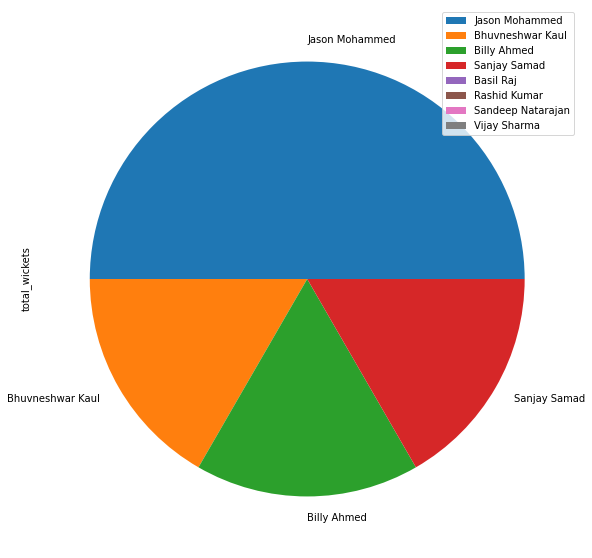

In [118]:
plot1 = df3.plot.pie(y='total_wickets', figsize=(10, 10))

In [119]:
df3.to_csv('SRH_stats_bol.csv')